# $\mathcal{M}_{gg (\to h^{\ast}) \to ZZ} (c_6)$ sample reweighting & morphing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from physics.hstar import gghzz, c6
from physics.simulation import msq

In [2]:
sample = gghzz.Process(  
  msq.Component.SBI,
  (1.4783394,'/viper/u/taepa/mcfm/MCFM-10.3/Bin/ggZZ2e2m_sbi/events.csv', 1e5)
)

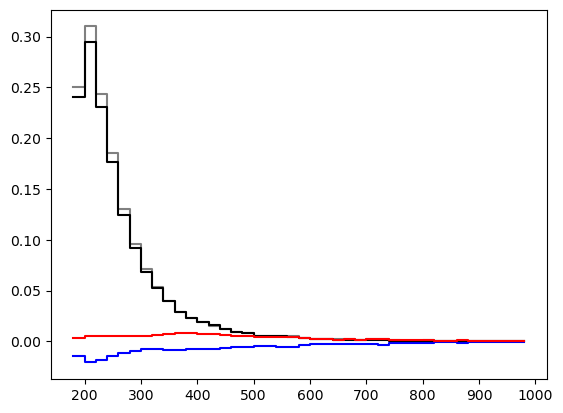

In [3]:
# compute m4l
ileptons = range(3,7)

events = sample[msq.Component.SBI]

p4l_px = np.sum([events.kinematics[f'p{i}_px'] for i in ileptons], axis=0)
p4l_py = np.sum([events.kinematics[f'p{i}_py'] for i in ileptons], axis=0)
p4l_pz = np.sum([events.kinematics[f'p{i}_pz'] for i in ileptons], axis=0)
p4l_E = np.sum([events.kinematics[f'p{i}_E'] for i in ileptons], axis=0)
m4l = np.sqrt(p4l_E**2 - p4l_px**2 - p4l_py**2 - p4l_pz**2)

# reweight to (S,B,I) components
m4l_bins = np.arange(180.0,1020.0,20.0)
# m4l_centers = 0.5 * (m4l_bins[1:] + m4l_bins[:-1])

h_m4l_sbi, _ = np.histogram(m4l, bins=m4l_bins, weights=events.weights)
h_m4l_sig, _ = np.histogram(m4l, bins=m4l_bins, weights=sample[msq.Component.SIG].weights)
h_m4l_bkg, _ = np.histogram(m4l, bins=m4l_bins, weights=sample[msq.Component.BKG].weights)
h_m4l_int, _ = np.histogram(m4l, bins=m4l_bins, weights=sample[msq.Component.INT].weights)

plt.step(m4l_bins[:-1], h_m4l_sbi, where='post', color='black', label='SBI', zorder=9)
plt.step(m4l_bins[:-1], h_m4l_sig, where='post', color='red', label='SIG', zorder=10)
plt.step(m4l_bins[:-1], h_m4l_bkg, where='post', color='grey', label='BKG', zorder=7)
plt.step(m4l_bins[:-1], h_m4l_int, where='post', color='blue', label='INT', zorder=8)

Alternatively, a sample that is generated on an signal/interference-only baseline will

0.15
-0.21898968826347026
1.6173335072379649
1.548343816067676


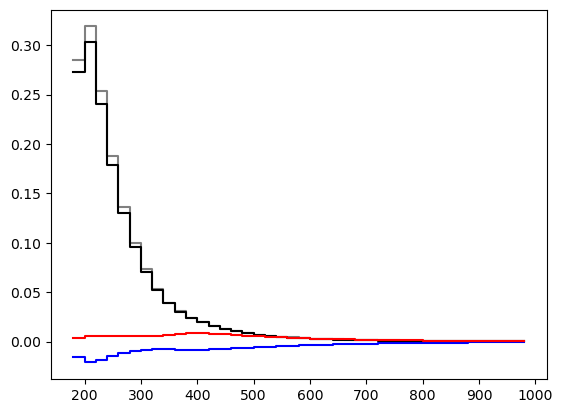

In [4]:
sample = gghzz.Process(  
  msq.Component.SIG,
  (0.15,'/raven/u/taepa/mcfm/MCFM-10.3/Bin/ggZZ2e2m_sig/events.csv',1e6)
  # (-0.54289930E-01,'/viper/u/taepa/mcfm/MCFM-10.3/Bin/ggZZ4e_int/events.csv'),
  # (-0.54289930E-01,'/viper/u/taepa/mcfm/MCFM-10.3/Bin/ggZZ4m_int/events.csv')
)

# compute m4l
ileptons = range(3,7)

# events = sample[msq.Component.BKG]
# print(np.where(np.isnan(sample[msq.Component.BKG].weights)))
# print(events.kinematics.iloc[np.where(np.isnan(sample_int[msq.Component.BKG].weights))])
# print(events.components.iloc[np.where(np.isnan(sample_int[msq.Component.BKG].weights))])
# print(events.weights.iloc[np.where(np.isnan(sample_int[msq.Component.BKG].weights))])

events_sbi = sample[msq.Component.SBI]
events_sig = sample[msq.Component.SIG]
events_bkg = sample[msq.Component.BKG]
events_int = sample[msq.Component.INT]

events_sbi.kinematics = events_sbi.kinematics.iloc[np.where(~np.isnan(events_sbi.weights))]
events_sbi.weights = events_sbi.weights.iloc[np.where(~np.isnan(events_sbi.weights))]
events_sbi.components = events_sbi.components.iloc[np.where(~np.isnan(events_sbi.weights))]
events_sig.kinematics = events_sig.kinematics.iloc[np.where(~np.isnan(events_sig.weights))]
events_sig.weights = events_sig.weights.iloc[np.where(~np.isnan(events_sig.weights))]
events_sig.components = events_sig.components.iloc[np.where(~np.isnan(events_sig.weights))]
events_bkg.kinematics = events_bkg.kinematics.iloc[np.where(~np.isnan(events_bkg.weights))]
events_bkg.weights = events_bkg.weights.iloc[np.where(~np.isnan(events_bkg.weights))]
events_bkg.components = events_bkg.components.iloc[np.where(~np.isnan(events_int.weights))]
events_int.kinematics = events_int.kinematics.iloc[np.where(~np.isnan(events_int.weights))]
events_int.weights = events_int.weights.iloc[np.where(~np.isnan(events_int.weights))]
events_int.components = events_int.components.iloc[np.where(~np.isnan(events_int.weights))]

p4l_px = np.sum([events_sbi.kinematics[f'p{i}_px'] for i in ileptons], axis=0)
p4l_py = np.sum([events_sbi.kinematics[f'p{i}_py'] for i in ileptons], axis=0)
p4l_pz = np.sum([events_sbi.kinematics[f'p{i}_pz'] for i in ileptons], axis=0)
p4l_E = np.sum([events_sbi.kinematics[f'p{i}_E'] for i in ileptons], axis=0)
m4l = np.sqrt(p4l_E**2 - p4l_px**2 - p4l_py**2 - p4l_pz**2)

# reweight to (S,B,I) components
m4l_bins = np.arange(180.0,1020.0,20.0)
# m4l_centers = 0.5 * (m4l_bins[1:] + m4l_bins[:-1])

print(events_sig.weights.sum())
print(events_int.weights.sum())
print(events_bkg.weights.sum())
print(events_sbi.weights.sum())

h_m4l_sbi, _ = np.histogram(m4l, bins=m4l_bins, weights=events_sbi.weights)
h_m4l_sig, _ = np.histogram(m4l, bins=m4l_bins, weights=events_sig.weights)
h_m4l_bkg, _ = np.histogram(m4l, bins=m4l_bins, weights=events_bkg.weights)
h_m4l_int, _ = np.histogram(m4l, bins=m4l_bins, weights=events_int.weights)

plt.step(m4l_bins[:-1], h_m4l_sbi, where='post', color='black', label='SBI', zorder=9)
plt.step(m4l_bins[:-1], h_m4l_sig, where='post', color='red', label='SIG', zorder=10)
plt.step(m4l_bins[:-1], h_m4l_bkg, where='post', color='grey', label='BKG', zorder=7)
plt.step(m4l_bins[:-1], h_m4l_int, where='post', color='blue', label='INT', zorder=8)

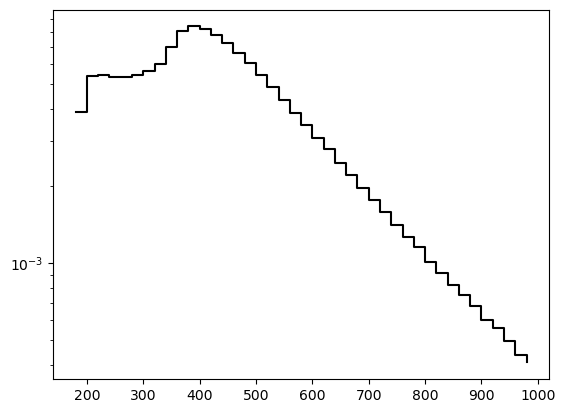

In [5]:
# h_m4l_bkg, _ = np.histogram(m4l, bins=m4l_bins, weights=sample_int[msq.Component.BKG].weights)
plt.step(m4l_bins[:-1], h_m4l_sig, where='post', color='black', label='BKG', zorder=7)
plt.yscale('log')

## $c_6$ morphing

The SM components can be obtained by the reweighting procedure above. For each SM component, the $c_6$-dependent modification is given by a polynomial.
- Signal-squared: $$f_{\mathrm{sig}}(x | c_6) = f^{(4)}(c_6) = a_{\mathrm{sig}}(x) + b_{\mathrm{sig}}(x) c_6 + d_{\mathrm{sig}}(x) c_6^2 + e_{\mathrm{sig}}(x) c_6^3 + f_{\mathrm{sig}}(x) c_6^4$$
- Signal-times-background interference: $$f_{\mathrm{sint}}(x | c_6) = f^{(4)}(c_6) = a_{\mathrm{int}}(x) + b_{\mathrm{int}}(x) c_6 + d_{\mathrm{int}}(x) c_6^2 $$

Since the morphing is specific to the component component, a modifier class dedicated to each should be configured with the sufficient number of distinct $c_6$-coordinates to solve the polynomial dependence.

In [6]:
c6mod_sbi = c6.Modifier( msq.Component.SBI, c6_values = [-5, -1, 0, 1, 5] )
c6mod_sig = c6.Modifier( msq.Component.SIG, c6_values = [-5, -1, 0, 1, 5])
c6mod_int = c6.Modifier( msq.Component.INT, c6_values = [ -5, 0,  5])

Then, the varied weights of the events can be obtained by calling on `modify()` on the appropriate sample and the desired value(s) of $c_6$.

In [7]:
sample = gghzz.Process(  
  msq.Component.SIG,
  (1.0,'/raven/u/taepa/mcfm/MCFM-10.3/Bin/ggZZ2e2m_sig/events.csv', 1e4)
)

### Closure check of morphing

As a self-closure check, the morphed event weight at any $c_6$ value (i.e. evaluated from the polynomial dependence) should correspond with the correct (i.e. as actually evaluted by MCFM).

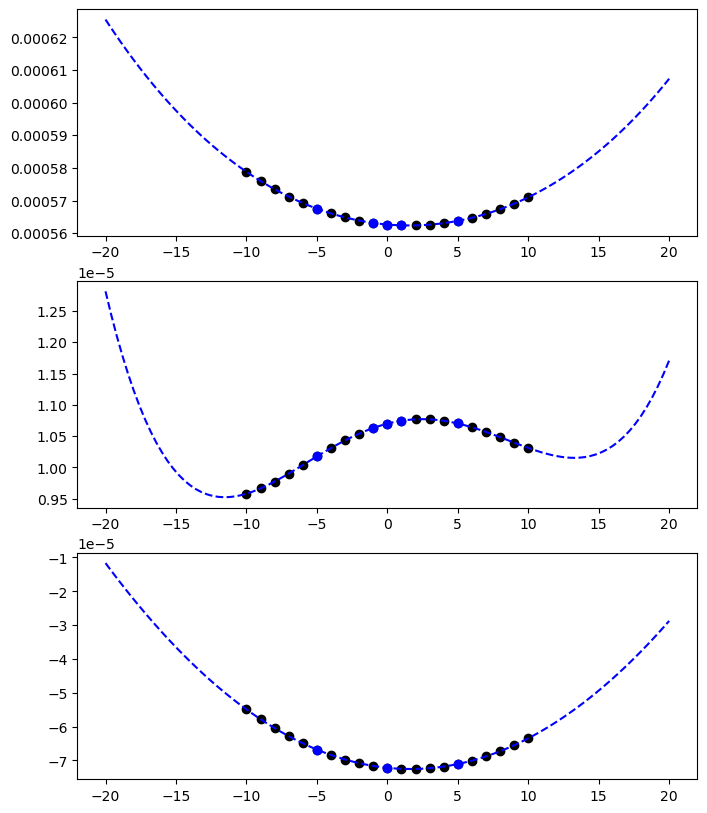

In [8]:
import random

# let's look a specific event
random_event_index = random.randint(0,999)

# over many values of c6
c6_values = np.linspace(-20.0,20.0,101)
mcfm_c6_pts = np.linspace(-10,10,21)

# for each component component
c6wt_sbi = c6mod_sbi.modify(sample, c6_values)[0][random_event_index]
c6wt_sig = c6mod_sig.modify(sample, c6_values)[0][random_event_index]
c6wt_int = c6mod_int.modify(sample, c6_values)[0][random_event_index]

mcfm_msq_c6_sbi = [f'msq_sbi_c6_{i}' for i in range(1,22)]
mcfm_msq_c6_sig = [f'msq_sig_c6_{i}' for i in range(1,22)]
mcfm_msq_c6_int = [f'msq_int_c6_{i}' for i in range(1,22)]

events_sbi = sample[msq.Component.SBI]
events_sig = sample[msq.Component.SIG]
events_int = sample[msq.Component.INT]

# all MCFM-generated points
mcfm_wt_c6_sbi = np.zeros(21)
mcfm_wt_c6_sig = np.zeros(21)
mcfm_wt_c6_int = np.zeros(21)
for i in range(21):
  mcfm_wt_c6_sbi[i] = events_sbi.weights.iloc[random_event_index] * events_int.components[f'msq_sbi_c6_{i+1}'].iloc[random_event_index] / events_sbi.components['msq_sbi_sm'].iloc[random_event_index]
  mcfm_wt_c6_sig[i] = events_sig.weights.iloc[random_event_index] * events_int.components[f'msq_sig_c6_{i+1}'].iloc[random_event_index] / events_sbi.components['msq_sig_sm'].iloc[random_event_index]
  mcfm_wt_c6_int[i] = events_int.weights.iloc[random_event_index] * events_int.components[f'msq_int_c6_{i+1}'].iloc[random_event_index] / events_sbi.components['msq_int_sm'].iloc[random_event_index]

# subset of MCFM-generated points for modifier
xsratio_sbi = np.zeros(5)
mcfm_msq_inputs_sbi = ['msq_sbi_c6_6', 'msq_sbi_c6_10', 'msq_sbi_c6_11', 'msq_sbi_c6_12', 'msq_sbi_c6_16']
xsratio_sig = np.zeros(5)
mcfm_msq_inputs_sig = ['msq_sig_c6_6', 'msq_sig_c6_10', 'msq_sig_c6_11', 'msq_sig_c6_12', 'msq_sig_c6_16']
xsratio_int = np.zeros(3)
mcfm_msq_inputs_int = ['msq_int_c6_6', 'msq_int_c6_11', 'msq_int_c6_16']
for i in range(5):
  xsratio_sbi[i] = events_sbi.weights.iloc[random_event_index] * events_sbi.components[mcfm_msq_inputs_sbi[i]].iloc[random_event_index] / events_sbi.components['msq_sbi_sm'].iloc[random_event_index]
  xsratio_sig[i] = events_sig.weights.iloc[random_event_index] * events_sig.components[mcfm_msq_inputs_sig[i]].iloc[random_event_index] / events_sbi.components['msq_sig_sm'].iloc[random_event_index]
for i in range(3):
  xsratio_int[i] =  events_int.weights.iloc[random_event_index] * events_int.components[mcfm_msq_inputs_int[i]].iloc[random_event_index] / events_sbi.components['msq_int_sm'].iloc[random_event_index]

fig, (ax_sbi ,ax_sig, ax_int) = plt.subplots(3, 1, figsize=(8, 10))

ax_sbi.scatter([-5,-1,0,1,5], xsratio_sbi, marker='o', color='blue', label='MCFM (input)', zorder=10)
ax_sbi.scatter(mcfm_c6_pts, mcfm_wt_c6_sbi, marker='o', color='black', label='MCFM (all)')
ax_sbi.plot(c6_values, c6wt_sbi, color='blue', linestyle='--', label='morphed')

ax_sig.scatter([-5,-1,0,1,5], xsratio_sig, marker='o', color='blue', label='MCFM (input)', zorder=10)
ax_sig.scatter(mcfm_c6_pts, mcfm_wt_c6_sig, marker='o', color='black', label='SIG')
ax_sig.plot(c6_values, c6wt_sig, color='blue', linestyle='--', label='morphed')

ax_int.scatter([-5,0,5], xsratio_int, marker='o', color='blue', label='MCFM (input)', zorder=10)
ax_int.scatter(mcfm_c6_pts, mcfm_wt_c6_int, marker='o', color='black', label='INT')
ax_int.plot(c6_values, c6wt_int, color='blue', linestyle='--', label='morphed')